<font size="6">Zobrazenie kľúčových bodov pre metódu ORB</font>

In [10]:
import cv2
import matplotlib.pyplot as plt

Načítame fotku mačky

In [4]:
original_face = cv2.imread('data/cats/cat_1.jpg')

Zkonvertujeme obrázok z  formátu BGR na odtiene šedej

In [5]:
gray_face = cv2.cvtColor(original_face, cv2.COLOR_BGR2GRAY)

Vytvoríme objekt SIFT ktorý umožnuje detekciu a popis kľúčových bodov

In [6]:
sift = cv2.SIFT_create()

Zdetekujeme kľúčové body na šedej verzii obrázku a na jeho celej ploche. Výstupom tejto funkcie sú detegované kľúčové body a ich deskriptory. V našom prípade deskriptory ignorujeme (_) pretože ich priamo nevyužívame.

In [7]:
original_keypoints, _ = sift.detectAndCompute(gray_face, None)

Vykreslenie kľúčových bodov bez ohľadu na ich velkosť a aj s ohľadom na veľkosť

In [8]:
keypoints_without_size = cv2.drawKeypoints(original_face, original_keypoints, None, color=(0, 255, 0))
keypoints_with_size = cv2.drawKeypoints(original_face, original_keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

Vytvoríme graf s dvoma podgrafmi. V prvom sa zobrazuje pôvodný obrázok s kľúčovými bodmi bez ohľadu na ich veľkosť.
V druhom podrafe je je zobrazený rovnaký obrázok, ale s kľúčovými bodmi zohľadnenými na ich veľkosť a orientáciu

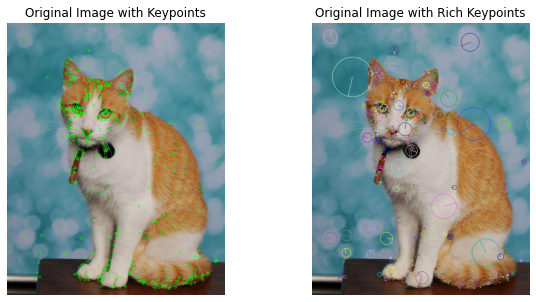

In [11]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(keypoints_without_size, cv2.COLOR_BGR2RGB))
plt.title('Original Image with Keypoints')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(keypoints_with_size, cv2.COLOR_BGR2RGB))
plt.title('Original Image with Rich Keypoints')
plt.axis('off')

plt.show()

<font size="6">Zobrazenie kľúčových bodov pre metódu FAST</font>

In [12]:
original_face = cv2.imread('data/cats/cat_1.jpg')
gray_face = cv2.cvtColor(original_face, cv2.COLOR_BGR2GRAY)

Vytvára objekt detektoru rýchlych príznakov FAST v knižnici OpenCV

In [13]:
fast = cv2.FastFeatureDetector_create() 

Identifikovali sme významné body v obraze pomocou algoritmu FAST, ktorý vrátil zoznam týchto bodov (keypoints). Nomax je metóda potlačenia nejednoznačnosti.

In [14]:
keypoints_with_nonmax = fast.detect(gray_face, None)

Zavolali sme funckiu, ktorá nám nastavila parameter potlačenia nejednoznačnosti na "False", čiže algoritmus detekoval všetky významné body.

In [15]:
fast.setNonmaxSuppression(False)

Identifikovali sme významné body bez použitia techniky potlačenia

In [16]:
keypoints_without_nonmax = fast.detect(gray_face, None)

Vytvorili sme obrázok image_with_nonmax, na ktorom sú vykreslené kľúčové body, ktoré boli detekované algoritmom FAST na základe vstupného obrazu. Farebná zložka pre každý kľúčový bod je nastavená na (0, 255, 0), čo reprezentuje zelenú farbu. Posledný parameter zabezpečuje vykreslenie s ich veľkostou a orientáciou

In [17]:
image_with_nonmax = cv2.drawKeypoints(original_face, keypoints_with_nonmax, None, color=(0,255,0),
                                       flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

Vykreslenie kľúčových bodov, pričom nebola použitá technika potlačenia nejednoznačnosti.

In [18]:
image_without_nonmax = cv2.drawKeypoints(original_face, keypoints_without_nonmax, None, color=(0,255,0), 
                                          flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

Prevedenie obrázkov do RGB formátu.

In [19]:
image_with_nonmax = cv2.cvtColor(image_with_nonmax, cv2.COLOR_BGR2RGB)
image_without_nonmax = cv2.cvtColor(image_without_nonmax, cv2.COLOR_BGR2RGB)

Vykreslenie obrázkov s kľúčovými bodmi.

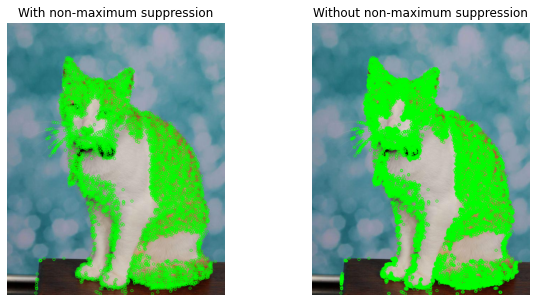

In [20]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_with_nonmax)
plt.title('With non-maximum suppression')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_without_nonmax)
plt.title('Without non-maximum suppression')
plt.axis('off')

plt.show()

<font size="6">Zobrazenie kľúčových bodov pre metódu ORB</font>

Načítanie obrázku do premenných.

In [21]:
original_face = cv2.imread('data/cats/cat_1.jpg')
query_face = cv2.imread('data/cats/cat_1.jpg')

Konverzia obrázkov na čiernobiele.

In [24]:
gray_face = cv2.cvtColor(original_face, cv2.COLOR_BGR2GRAY)
query_face_gray = cv2.cvtColor(query_face, cv2.COLOR_BGR2GRAY)

Vytvorenie objektu detektoru a deskriptoru ORB

In [25]:
orb = cv2.ORB_create()

Detekcia kľúčových bodov a výpočet deskriptorov pre dané obrázky.

In [26]:
original_keypoints, original_descriptor = orb.detectAndCompute(gray_face, None)
query_keypoints, query_descriptor = orb.detectAndCompute(query_face_gray, None)

Vykreslenie kľúčových bodov bez zvýraznenia veľkosti, čo znamená, že všetky kľúčové body majú rovnakú veľkosť

In [27]:
keypoints_without_size = cv2.drawKeypoints(original_face, original_keypoints, None, color=(0, 255, 0))

Vykresľuje kľúčové body so zvýraznením veľkosti.

In [28]:
keypoints_with_size = cv2.drawKeypoints(original_face, original_keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

Prevedenie z formátu BGR na formát RGB.

In [29]:
keypoints_without_size = cv2.cvtColor(keypoints_without_size, cv2.COLOR_BGR2RGB)
keypoints_with_size = cv2.cvtColor(keypoints_with_size, cv2.COLOR_BGR2RGB)

Vykreslenie obrázkov s kľúčovými bodmi.

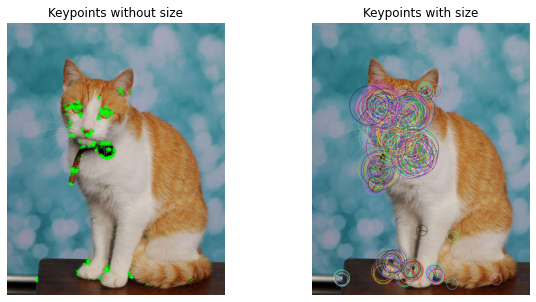

In [30]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(keypoints_without_size)
plt.title('Keypoints without size')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(keypoints_with_size)
plt.title('Keypoints with size')
plt.axis('off')

plt.show()

<font size="6">Klasifikácia pomocou ORB algoritmu na detekciu príznakov.</font>

In [31]:
import os
import numpy as np
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

DATA = "data3"
CLASSES = ["cats", "dogs"]

C:\Users\boris\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Získali sme zoznam obrázkov pre dané triedy, inicializovali ORB objekt, pre každý obrázok sme vykonali: načítanie vo 
farobnom formáte, zmenšili sme ho na 128x128 a použili ORB na detekciu kľúčových bodov a výpočet príznakov.

In [97]:
def get_orb_descriptors(class_name):
    images = os.listdir(os.path.join(DATA, class_name))
    images = [os.path.join(DATA, class_name, name) for name in images]
    descriptors = []
    
    orb = cv2.ORB_create()
    
    for img_path in images:
        img_rgb = cv2.imread(img_path)
        img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
        
        img_gray_resized = cv2.resize(img_gray, (128, 128))
        
        keypoints, des = orb.detectAndCompute(img_gray_resized, None)
        
        if des is not None:
            descriptors.append(des)
    
    return descriptors

Naplnili sme "Data_orb" príznakmi pre každú triedu obrázkov.

In [98]:
Data_orb = {}
for class_name in CLASSES:
    Data_orb[class_name] = np.concatenate(get_orb_descriptors(class_name))
    print("Data úspešne extrahované pre: ", class_name.upper())

Data úspešne extrahované pre:  CATS
Data úspešne extrahované pre:  DOGS


Určili sme počet kompomemtov, ktoré sú potrebné pre analýzi hlavných kompomemtov na základe príznakov zo všetkých obrázkov.

In [99]:
n_components = min(128, min(Data_orb[class_name].shape[0] for class_name in CLASSES))
n_components = min(n_components, min(Data_orb[class_name].shape[1] for class_name in CLASSES))
print("Počet komponentov:", n_components)

Počet komponentov: 32


Inicializovali sme objekt PCA, ktorý sa použil na analýzu hlavných komponentov a v matici príznakov reudukoval dimenzionalitu a snažil sa zachytiť hlavné vzory.

In [100]:
pca = PCA(n_components=n_components)

Naplnili sme PCA model na vstupné dáta, ktorý odhaduje parametre modelu na základne vstupných dát a transformuje dáta na novú dimenzionalitu.

In [101]:
for class_name in CLASSES:
    Data_orb[class_name] = pca.fit_transform(Data_orb[class_name])

Vytvorili sme označenie pre dáta.

In [102]:
labels_cats = np.zeros(len(Data_orb['cats']))
labels_dogs = np.ones(len(Data_orb['dogs']))

Zlúčili sme všetky príznaky do jedného poľa "x" a označení "y".

In [103]:
x = np.concatenate((Data_orb['cats'], Data_orb['dogs']), axis=0)
y = np.concatenate((labels_cats, labels_dogs), axis=0)

Zmenili sme tvar dát v poli "x", čo bolo potrebné pred vstupom do konktrétneho modelu, ktorý požaduje špecifický formát.

In [104]:
x = x.reshape(-1, n_components, 1, 1) 

Inicializovali sme k-fold krížovú validáciu.

In [105]:
k_fold = KFold(n_splits=5, shuffle=True)

Dáta sme rozdelili do 5 skupín. Pre každú iteráciu k-fold validácie sa určia indexy trénovacých a testovacích dát. Vytvorili sme nový sekvenčný model neurónovej siete s konvulučnými vrstvami (Conv2d) a vrstvami na redukciu priestorového rozmeru (MaxPooling2D) a nakoniec sme model prepojili aktivačnou funkciou "sigmoid", kvôli binarnej klasifikácii.

In [106]:
accuracies = []

for train_index, test_index in k_fold.split(x):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Define the CNN model
    model = Sequential([
        Conv2D(16, (3, 3), activation='relu', input_shape=(n_components, 1, 1), padding='same'),
        MaxPooling2D((2, 2), padding='same'),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), padding='same'),
        Conv2D(16, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), padding='same'),
        Flatten(),
        Dense(256, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(x_train, y_train, epochs=10, verbose=0)

    # Evaluate the model
    _, accuracy = model.evaluate(x_test, y_test)
    accuracies.append(accuracy)


C:\Users\boris\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


822/822 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6235 - loss: 0.6357
822/822 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6976 - loss: 0.5606
822/822 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6705 - loss: 0.5906
822/822 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8508 - loss: 0.6782
822/822 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6007 - loss: 0.6575


Vypočítali a vypísali sme priemer presností modelu.

In [109]:
average_accuracy = np.mean(accuracies)
print("Priemerná presnosť:", average_accuracy)

Priemerná presnosť: 0.6217584848403931


Zobrazili sme dva grafy kde: prvý graf zobrazuje hodnoty straty počas trénovania a validácie modelu v priebehu jednotlivých epoch a druhý graf zobrazuje presnosť modelu počas trénovania a validácie v priebehu jednotlivých epoch

KeyError: 'val_loss'

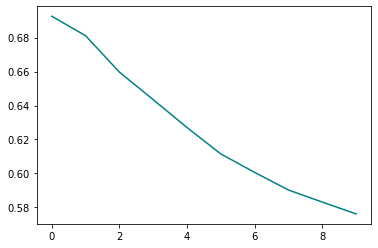

In [46]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


<font size="6">Klasifikácia pomocou SIFT algoritmu na detekciu príznakov.</font>

In [47]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

DATA = "data3"
CLASSES = ["cats", "dogs"]

Všetko zostáva rovnaké ako pri ORB, až na vytvorenie SIFT objektu namiesto ORB.

In [48]:
def get_sift_descriptors(class_name):
    images = os.listdir(os.path.join(DATA, class_name))
    images = [os.path.join(DATA, class_name, name) for name in images]
    descriptors = []
    
    sift = cv2.SIFT_create()
    
    for img_path in images:
        img_rgb = cv2.imread(img_path)
        img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
        
        img_gray_resized = cv2.resize(img_gray, (128, 128))
        
        keypoints, des = sift.detectAndCompute(img_gray_resized, None)
        
        if des is not None:
            descriptors.append(des)
    
    return descriptors

In [52]:
Data_sift = {}
for class_name in CLASSES:
    Data_sift[class_name] = np.concatenate(get_sift_descriptors(class_name))
    print("Data úspešne extrahované pre:", class_name.upper())


Data úspešne extrahované pre: CATS
Data úspešne extrahované pre: DOGS


In [53]:
n_components = min(128, min(Data_sift[class_name].shape[0] for class_name in CLASSES))
n_components = min(n_components, min(Data_sift[class_name].shape[1] for class_name in CLASSES))
print("Počet komponentov:", n_components)

Počet komponentov: 128


In [54]:
pca = PCA(n_components=n_components)

In [55]:
for class_name in CLASSES:
    Data_sift[class_name] = pca.fit_transform(Data_sift[class_name])

In [56]:
labels_cats = np.zeros(len(Data_sift['cats']))
labels_dogs = np.ones(len(Data_sift['dogs']))

In [58]:
x_train_cats, x_test_cats, y_train_cats, y_test_cats = train_test_split(Data_sift['cats'], labels_cats, test_size=0.3)
x_train_dogs, x_test_dogs, y_train_dogs, y_test_dogs = train_test_split(Data_sift['dogs'], labels_dogs, test_size=0.3)

In [59]:
x_train = np.concatenate((x_train_cats, x_train_dogs), axis=0)
x_test = np.concatenate((x_test_cats, x_test_dogs), axis=0)
y_train = np.concatenate((y_train_cats, y_train_dogs), axis=0)
y_test = np.concatenate((y_test_cats, y_test_dogs), axis=0)

In [60]:
x_train = x_train.reshape(-1, n_components, 1, 1)
x_test = x_test.reshape(-1, n_components, 1, 1)

Načítali sme obrázky a určili veľkosť obŕazku na ktorú sa majú obrázky zmenšiť a zabezpečili sme ich čiernobiele načítanie.

In [61]:
data = tf.keras.utils.image_dataset_from_directory('data3', image_size=(128, 128), color_mode='grayscale')
data = data.map(lambda x, y: (x / 255, y)) 

Found 697 files belonging to 2 classes.


In [62]:
k_fold = KFold(n_splits=5, shuffle=True)

In [63]:
accuracies = []

for train_index, test_index in k_fold.split(x_train):
    x_fold_train, x_fold_val = x_train[train_index], x_train[test_index]
    y_fold_train, y_fold_val = y_train[train_index], y_train[test_index]
    model = Sequential([
        Conv2D(16, (3, 3), activation='relu', input_shape=(n_components, 1, 1), padding='same'),
        MaxPooling2D((2, 2), padding='same'),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), padding='same'),
        Conv2D(16, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), padding='same'),
        Flatten(),
        Dense(256, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    history = model.fit(x_fold_train, y_fold_train, epochs=10, validation_data=(x_fold_val, y_fold_val), verbose=0)
    
    _, accuracy = model.evaluate(x_test, y_test)
    accuracies.append(accuracy)

C:\Users\boris\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


825/825 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8981 - loss: 0.3147
825/825 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8896 - loss: 0.3418
825/825 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9160 - loss: 0.2397
825/825 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8836 - loss: 0.3162
825/825 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8862 - loss: 0.3526


In [64]:
average_accuracy = np.mean(accuracies)
print("Priemerná presnosť:", average_accuracy)

Priemerná presnosť: 0.8951428294181824


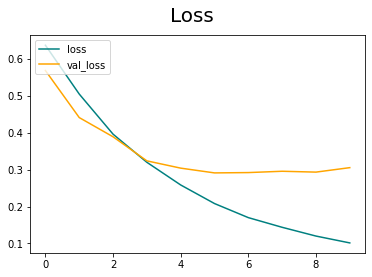

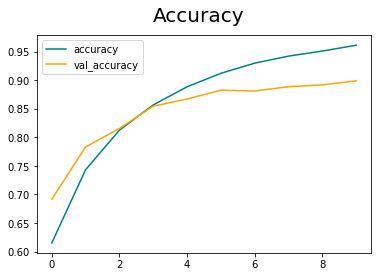

In [65]:
# Plot loss
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Plot accuracy
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


In [110]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

DATA = "data3"
CLASSES = ["cats", "dogs"]

In [111]:
def get_fast_descriptors(class_name):
    images = os.listdir(os.path.join(DATA, class_name))
    images = [os.path.join(DATA, class_name, name) for name in images]
    descriptors = []
    
    fast = cv2.FastFeatureDetector_create()  # Initialize FAST detector
    orb = cv2.ORB_create()  # Initialize ORB extractor
    
    for img_path in images:
        img_rgb = cv2.imread(img_path)
        img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
        
        img_gray_resized = cv2.resize(img_gray, (128, 128))  # Resize the image
        
        # Detect keypoints using FAST
        keypoints = fast.detect(img_gray_resized, None)
        
        # Compute descriptors using ORB
        _, des = orb.compute(img_gray_resized, keypoints)
        
        if des is not None:
            descriptors.append(des)
    
    return descriptors

In [112]:
Data_fast = {}
for class_name in CLASSES:
    Data_fast[class_name] = np.concatenate(get_fast_descriptors(class_name))
    print("Data úspešne extrahované pre ", class_name.upper())

Data úspešne extrahované pre  CATS
Data úspešne extrahované pre  DOGS


In [113]:
n_components = min(128, min(Data_fast[class_name].shape[0] for class_name in CLASSES))
n_components = min(n_components, min(Data_fast[class_name].shape[1] for class_name in CLASSES))
print("Počet komponentov:", n_components)
pca = PCA(n_components=n_components)

Počet komponentov: 32


In [114]:
for class_name in CLASSES:
    Data_fast[class_name] = pca.fit_transform(Data_fast[class_name])

In [115]:
labels_cats = np.zeros(len(Data_fast['cats']))
labels_dogs = np.ones(len(Data_fast['dogs']))

In [116]:
x_train_cats, x_test_cats, y_train_cats, y_test_cats = train_test_split(Data_fast['cats'], labels_cats, test_size=0.3)
x_train_dogs, x_test_dogs, y_train_dogs, y_test_dogs = train_test_split(Data_fast['dogs'], labels_dogs, test_size=0.3)

In [117]:
x_train = np.concatenate((x_train_cats, x_train_dogs), axis=0)
x_test = np.concatenate((x_test_cats, x_test_dogs), axis=0)
y_train = np.concatenate((y_train_cats, y_train_dogs), axis=0)
y_test = np.concatenate((y_test_cats, y_test_dogs), axis=0)

In [118]:
x_train = x_train.reshape(-1, n_components, 1, 1)  # Shape: (num_samples, height, width, channels)
x_test = x_test.reshape(-1, n_components, 1, 1)  # Shape: (num_samples, height, width, channels)

In [119]:
data = tf.keras.utils.image_dataset_from_directory('data3', image_size=(128, 128), color_mode='grayscale')
data = data.map(lambda x, y: (x / 255, y))  # Normalize data

Found 697 files belonging to 2 classes.


In [120]:
k_fold = KFold(n_splits=5, shuffle=True)

In [121]:
accuracies = []

for train_index, test_index in k_fold.split(x_train):
    x_fold_train, x_fold_val = x_train[train_index], x_train[test_index]
    y_fold_train, y_fold_val = y_train[train_index], y_train[test_index]

    # Define the CNN model
    model = Sequential([
        Conv2D(16, (3, 3), activation='relu', input_shape=(n_components, 1, 1), padding='same'),
        MaxPooling2D((2, 2), padding='same'),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), padding='same'),
        Conv2D(16, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2), padding='same'),
        Flatten(),
        Dense(256, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(x_fold_train, y_fold_train, epochs=10, validation_data=(x_fold_val, y_fold_val), verbose=0)

    # Evaluate the model
    _, accuracy = model.evaluate(x_test, y_test)
    accuracies.append(accuracy)

C:\Users\boris\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1431/1431 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7734 - loss: 0.4556
1431/1431 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6508 - loss: 0.5727
1431/1431 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7445 - loss: 0.5067
1431/1431 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7140 - loss: 0.5479
1431/1431 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7462 - loss: 0.5021


In [122]:
average_accuracy = np.mean(accuracies)
print("Priemerná presnosť:", average_accuracy)

Priemerná presnosť: 0.7122827053070069


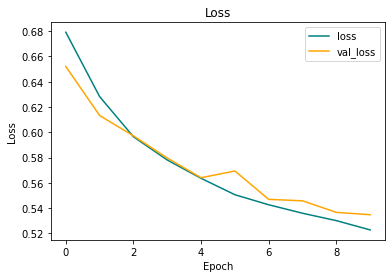

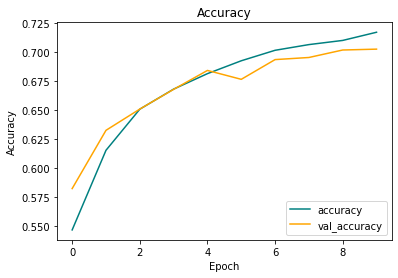

In [91]:
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc="upper right")
plt.show()

plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc="lower right")
plt.show()


In [27]:
data_src = 'data3'

In [28]:
os.listdir(data_src)

['cats', 'dogs']

In [29]:
allowed_extensions = ['jpeg','jpg', 'bmp', 'png']

In [30]:
allowed_extensions

['jpeg', 'jpg', 'bmp', 'png']

In [31]:
for image_class in os.listdir(data_src): 
    for image in os.listdir(os.path.join(data_src, image_class)):
        image_path = os.path.join(data_src, image_class, image)
        try: 
            can_open_with_cv = cv2.imread(image_path)
            right_extension = imghdr.what(image_path)
            if right_extension not in allowed_extensions: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

Načítanie dát

In [32]:
import numpy as np
from matplotlib import pyplot as plt

In [33]:
data = tf.keras.utils.image_dataset_from_directory('data3')

Found 697 files belonging to 2 classes.


In [34]:
data_iterator = data.as_numpy_iterator()

In [35]:
batch = data_iterator.next()

In [36]:
batch

(array([[[[112.        ,  74.        ,  12.        ],
          [112.        ,  74.        ,   9.        ],
          [113.09375   ,  74.09375   ,  19.09375   ],
          ...,
          [136.09375   ,  94.09375   ,  34.09375   ],
          [137.        ,  95.        ,  35.        ],
          [132.        ,  90.        ,  30.        ]],
 
         [[112.        ,  74.        ,  12.        ],
          [112.        ,  74.        ,   9.        ],
          [112.28125   ,  73.28125   ,  18.28125   ],
          ...,
          [136.71875   ,  93.28125   ,  32.5625    ],
          [137.4375    ,  94.        ,  33.28125   ],
          [132.4375    ,  89.        ,  28.28125   ]],
 
         [[112.        ,  74.        ,  12.        ],
          [112.        ,  74.        ,   9.        ],
          [111.46875   ,  72.46875   ,  17.46875   ],
          ...,
          [136.46875   ,  92.46875   ,  31.46875   ],
          [137.        ,  93.        ,  32.        ],
          [132.        ,  88.  

Optimalizácia/škálovanie dát

In [37]:
data = data.map(lambda x,y: (x/255, y))

In [38]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

Rozdelenie dát

In [39]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [40]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Vytvorenie modelu

In [41]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [43]:
model = Sequential()

In [44]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [45]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_51 (Conv2D)                   │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_51 (MaxPooling2D)      │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_52 (Conv2D)                   │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_52 (MaxPooling2D)      │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_53 (MaxPooling2D)      │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_17 (Flatten)                 │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

Trénovanie modelu

In [47]:
log_dir='logs'

Callback TensorBoard automaticky zapisuje dôležité informácie o trénovaní modelu do určeného adresára.

In [48]:
callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [50]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[callback])

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 295ms/step - accuracy: 0.5080 - loss: 0.8369 - val_accuracy: 0.6719 - val_loss: 0.6879
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 280ms/step - accuracy: 0.6189 - loss: 0.6858 - val_accuracy: 0.5469 - val_loss: 0.6736
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 300ms/step - accuracy: 0.6154 - loss: 0.6663 - val_accuracy: 0.6719 - val_loss: 0.6452
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 324ms/step - accuracy: 0.7293 - loss: 0.6041 - val_accuracy: 0.7266 - val_loss: 0.5663
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 306ms/step - accuracy: 0.8251 - loss: 0.4715 - val_accuracy: 0.7734 - val_loss: 0.4543
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 314ms/step - accuracy: 0.8546 - loss: 0.3558 - val_accuracy: 0.8828 - val_loss: 0.2962
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 309ms/step - accuracy: 0.8894 - loss: 0.3276 - val_accuracy: 0.7891 - val_loss: 0.4184
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 304ms/step - accuracy: 0.9225 - loss: 0.2225 - val_accuracy: 0.

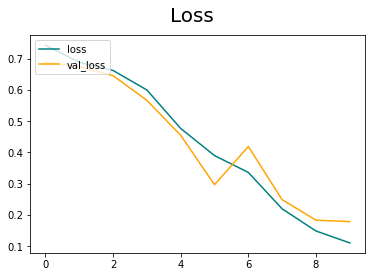

In [51]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

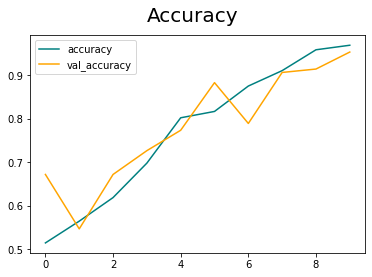

In [52]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [53]:
print(hist.history['accuracy'])

[0.5145833492279053, 0.5645833611488342, 0.6187499761581421, 0.6979166865348816, 0.8020833134651184, 0.8166666626930237, 0.875, 0.9104166626930237, 0.9583333134651184, 0.96875]
